In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import PIL
from PIL import Image


In [3]:
results = pd.read_csv('/Volumes/CatBreen/aurora_outputs/snow_poles_outputs_resized_LRe4_BS64_E100_clean_SNEX_IN/eval/results.csv')
results.head()

,Unnamed: 0,Camera,filename,x1_true,y1_true,x2_true,y2_true,x1_pred,y1s_pred,x2_pred,y2_pred,top_pixel_error,bottom_pixel_error,total_length_pixel,total_length_pixel_actual,automated_depth,manual_snowdepth,difference
0,0,W2B,W2B_WSCT0020.JPG,135.67105,72.996490,135.37631,186.43742,135.88866,74.563835,135.54382,183.40360,1.582378,3.038450,108.840309,113.441315,10.665601,-1.764,-12.429601
1,1,W2B,W2B_WSCT0024.JPG,136.11316,72.996490,136.40790,187.22339,135.81169,73.541466,135.78185,184.97597,0.622801,2.332990,111.434509,114.227280,3.658175,-3.888,-7.546175
2,2,W2B,W2B_WSCT0025.JPG,136.11316,72.996490,135.81842,185.91345,135.63493,72.851580,135.65598,183.99530,0.499699,1.925018,111.143723,112.917343,4.443996,-0.348,-4.791996
3,3,W2B,W2B_WSCT0036.JPG,136.26053,72.734505,136.26053,186.43742,135.87595,73.493980,135.83720,185.01791,0.851297,1.481287,111.523941,113.702919,3.416470,-2.472,-5.888470
4,4,W2B,W2B_WSCT0050.JPG,136.11316,78.236260,136.40790,191.15321,136.39491,77.997250,135.94210,189.76169,0.369471,1.467418,111.765350,112.917336,2.758759,-0.348,-3.106759


In [5]:
## average error at each camera 
summary = results.groupby(['Camera']).mean()

/var/folders/yv/mzlh10ts71lg0nhr7pw_0q080000gn/T/ipykernel_37554/2502812607.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary = results.groupby(['Camera']).mean()


In [9]:
dateinfo = pd.read_csv('/Users/catherinebreen/Documents/Chapter1/WRRsubmission/labeledImgs_datetime_info.csv')
dateinfo.rename(columns={'filenames':'filename'}, inplace=True)
results = results.merge(dateinfo, on = 'filename', how='left')

,Unnamed: 0_x,Camera,filename,x1_true,y1_true,x2_true,y2_true,x1_pred,y1s_pred,x2_pred,y2_pred,top_pixel_error,bottom_pixel_error,total_length_pixel,total_length_pixel_actual,automated_depth,manual_snowdepth,difference,Unnamed: 0_y,datetimes
0,0,W2B,W2B_WSCT0020.JPG,135.67105,72.996490,135.37631,186.43742,135.88866,74.563835,135.54382,183.40360,1.582378,3.038450,108.840309,113.441315,10.665601,-1.764,-12.429601,13299,2019/09/30 11:00
1,1,W2B,W2B_WSCT0024.JPG,136.11316,72.996490,136.40790,187.22339,135.81169,73.541466,135.78185,184.97597,0.622801,2.332990,111.434509,114.227280,3.658175,-3.888,-7.546175,13454,2019/10/02 11:00
2,2,W2B,W2B_WSCT0025.JPG,136.11316,72.996490,135.81842,185.91345,135.63493,72.851580,135.65598,183.99530,0.499699,1.925018,111.143723,112.917343,4.443996,-0.348,-4.791996,13437,2019/10/02 12:00
3,3,W2B,W2B_WSCT0036.JPG,136.26053,72.734505,136.26053,186.43742,135.87595,73.493980,135.83720,185.01791,0.851297,1.481287,111.523941,113.702919,3.416470,-2.472,-5.888470,13360,2019/10/08 11:00
4,4,W2B,W2B_WSCT0050.JPG,136.11316,78.236260,136.40790,191.15321,136.39491,77.997250,135.94210,189.76169,0.369471,1.467418,111.765350,112.917336,2.758759,-0.348,-3.106759,13225,2019/10/15 11:00


In [11]:
results["date"] = pd.to_datetime(results["datetimes"])


In [14]:
results.head()

,Unnamed: 0_x,Camera,filename,x1_true,y1_true,x2_true,y2_true,x1_pred,y1s_pred,x2_pred,...,top_pixel_error,bottom_pixel_error,total_length_pixel,total_length_pixel_actual,automated_depth,manual_snowdepth,difference,Unnamed: 0_y,datetimes,date
0,0,W2B,W2B_WSCT0020.JPG,135.67105,72.996490,135.37631,186.43742,135.88866,74.563835,135.54382,...,1.582378,3.038450,108.840309,113.441315,10.665601,-1.764,-12.429601,13299,2019/09/30 11:00,2019-09-30 11:00:00
1,1,W2B,W2B_WSCT0024.JPG,136.11316,72.996490,136.40790,187.22339,135.81169,73.541466,135.78185,...,0.622801,2.332990,111.434509,114.227280,3.658175,-3.888,-7.546175,13454,2019/10/02 11:00,2019-10-02 11:00:00
2,2,W2B,W2B_WSCT0025.JPG,136.11316,72.996490,135.81842,185.91345,135.63493,72.851580,135.65598,...,0.499699,1.925018,111.143723,112.917343,4.443996,-0.348,-4.791996,13437,2019/10/02 12:00,2019-10-02 12:00:00
3,3,W2B,W2B_WSCT0036.JPG,136.26053,72.734505,136.26053,186.43742,135.87595,73.493980,135.83720,...,0.851297,1.481287,111.523941,113.702919,3.416470,-2.472,-5.888470,13360,2019/10/08 11:00,2019-10-08 11:00:00
4,4,W2B,W2B_WSCT0050.JPG,136.11316,78.236260,136.40790,191.15321,136.39491,77.997250,135.94210,...,0.369471,1.467418,111.765350,112.917336,2.758759,-0.348,-3.106759,13225,2019/10/15 11:00,2019-10-15 11:00:00


In [32]:
len(results['Camera'])

892

In [16]:
len(pd.unique(results['Camera']))

20

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


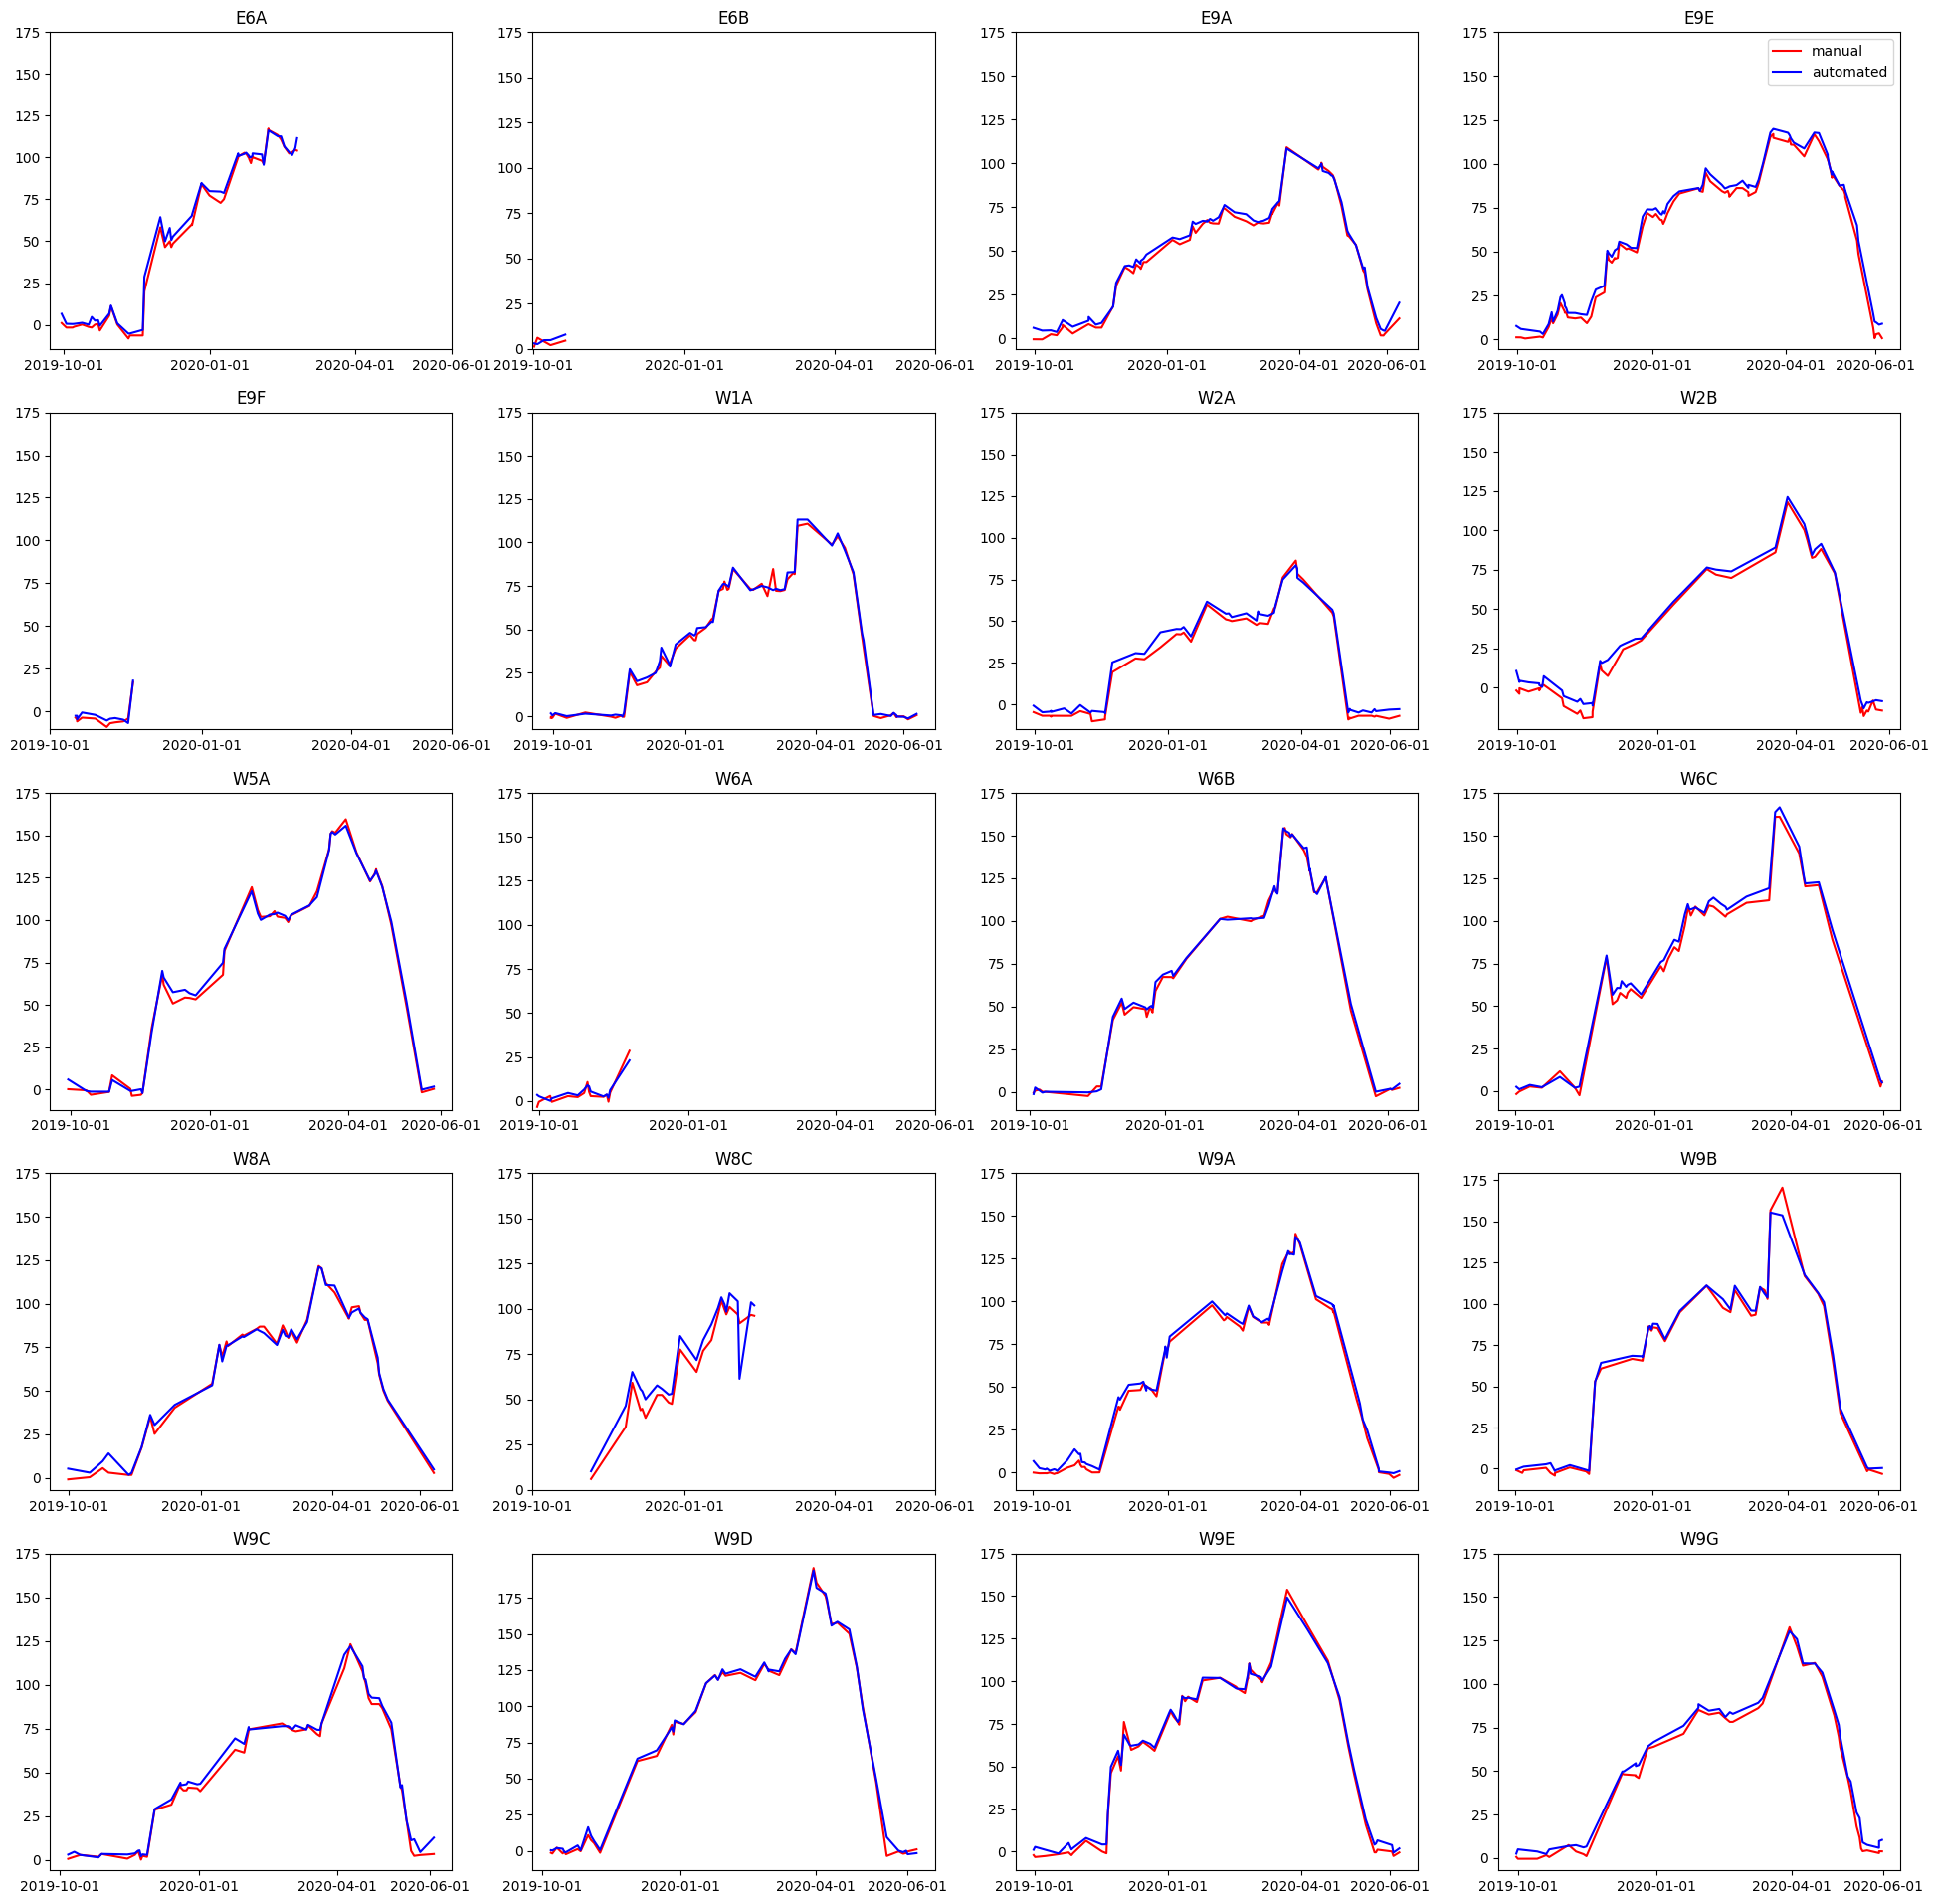

In [31]:
## plot all 20 cameras 

camera_list = sorted(pd.unique(results['Camera']))

fig, axs = plt.subplots(5, 4, figsize=(24, 24))
rows = 5
cols = 4
idx = 0
for row in range(rows):
    for col in range(cols):
        subset = results[results['Camera'] == camera_list[idx]]
        #plt.plot(subset["date"],pd.to_numeric(subset['manual_snowdepth']), color = 'red', label = 'manual') ##actual
        #plt.plot(subset["date"],pd.to_numeric(subset['automated_depth']), color = 'blue', label = 'automated') ## pred
        #plt.xticks([pd.to_datetime('2019-10-01'),pd.to_datetime('2020-01-01'),pd.to_datetime('2020-04-01'),pd.to_datetime('2020-06-01')])
        #plt.legend()
        #plt.ylabel('snow depth (cm)')
        axs[row, col].plot(subset["date"],pd.to_numeric(subset['manual_snowdepth']), color = 'red', label = 'manual') ##actual
        axs[row, col].plot(subset["date"],pd.to_numeric(subset['automated_depth']), color = 'blue', label = 'automated') ## pred
        axs[row,col].set_xticks([pd.to_datetime('2019-10-01'),pd.to_datetime('2020-01-01'),pd.to_datetime('2020-04-01'),pd.to_datetime('2020-06-01')])
        axs[row, col].set_yticks([0, 25, 50, 75, 100, 125, 150, 175])
        axs[row,col].title.set_text(camera_list[idx])
        axs[0,3].legend()
        idx += 1

In [70]:
test = results[results['Camera'] == 'W9B']
test = test[test['date'] == '2020-03-28 11:00:00']
image = Image.open('/Volumes/CatBreen/CV4ecology/SNEX20_TLI_resized_clean/W9B/W9B_WSCT0379.JPG')

b_pred = [test['x2_pred'].iloc[0], test['y2_pred'].iloc[0]]
b_actual = [test['x2_true'].iloc[0], test['y2_true'].iloc[0]]

b_pred = np.array(b_pred, dtype='float32')
b_actual = np.array(b_actual, dtype='float32')

b_pred = b_pred * [448 / 224, 448 / 224] ### o
b_actual = b_actual * [448 / 224, 448 / 224] ### o

plt.imshow(image)
plt.plot(b_pred[0], b_pred[1], 'b.',  mfc='none', markersize=20)
plt.plot(b_actual[0], b_actual[1],  'r.',  mfc='none', markersize=20)


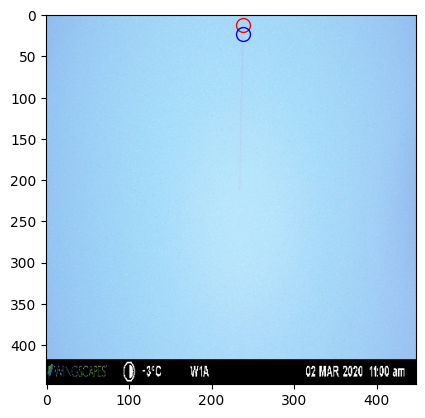

In [86]:
test = results[results['Camera'] == 'W1A']
test = test[test['date'] == '2020-03-02 11:00:00']
image = Image.open('/Volumes/CatBreen/CV4ecology/SNEX20_TLI_resized_clean/W1A/W1A_WSCT0324.JPG')

b_pred = [test['x1_pred'].iloc[0], test['y1s_pred'].iloc[0]]
b_actual = [test['x1_true'].iloc[0], test['y1_true'].iloc[0]]

b_pred = np.array(b_pred, dtype='float32')
b_actual = np.array(b_actual, dtype='float32')

b_pred = b_pred * [448 / 224, 448 / 224] ### o
b_actual = b_actual * [448 / 224, 448 / 224] ### o

plt.imshow(image)
plt.plot(b_pred[0], b_pred[1], 'r.',  mfc='none', markersize=20)
plt.plot(b_actual[0], b_actual[1],  'b.',  mfc='none', markersize=20)
